# Lec 07. Activation Functions

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Drawing Activation Functions

In [3]:
x = Variable(torch.linspace(-5, 5, 500))

y_sigmoid = torch.sigmoid(x).data.numpy()
y_relu = F.relu(x).data.numpy()
y_leaky_relu = F.leaky_relu(x, negative_slope=0.1).data.numpy()
y_softplus = F.softplus(x).data.numpy()

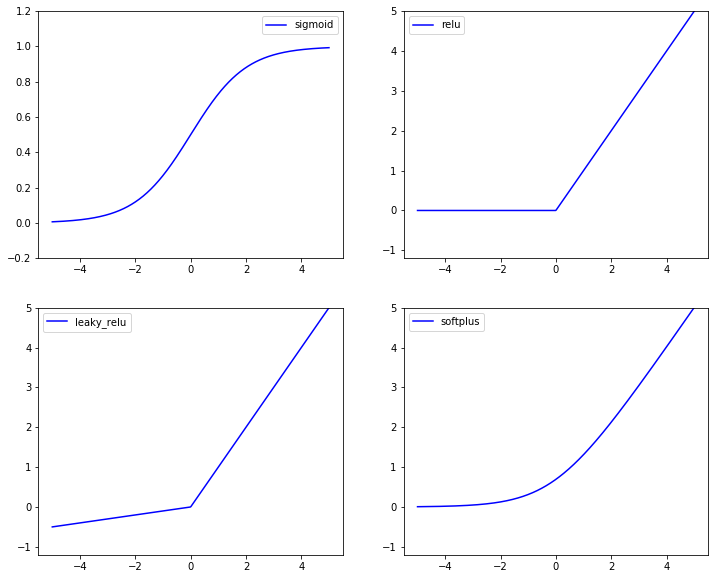

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.plot(x.data.numpy(), y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x.data.numpy(), y_relu, c='blue', label='relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x.data.numpy(), y_leaky_relu, c='blue', label='leaky_relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x.data.numpy(), y_softplus, c='blue', label='softplus')
plt.ylim((-1.2, 5))
plt.legend(loc='best')
plt.show()

## 2. Generating Data

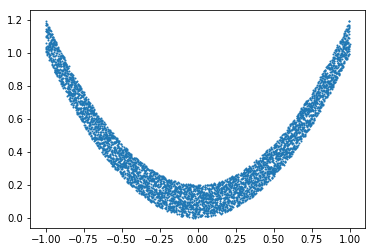

In [5]:
x = torch.linspace(-1, 1, 5000)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy(), s=1)
plt.show()

## 3. Define NonLinear Model

In [6]:
x.shape, y.shape

(torch.Size([5000]), torch.Size([5000]))

In [7]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

x.shape, y.shape

(torch.Size([5000, 1]), torch.Size([5000, 1]))

In [8]:
# Build neural networks
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias=True)

model = nn.Sequential(hidden, activation, output)

In [9]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

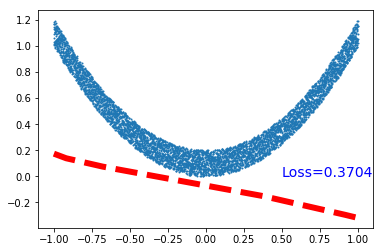

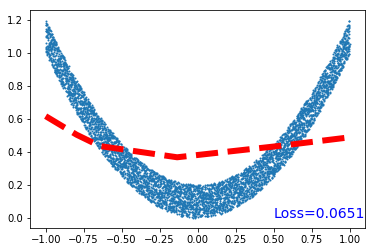

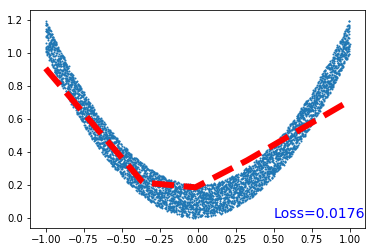

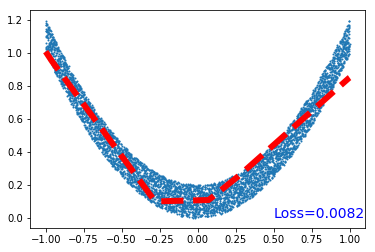

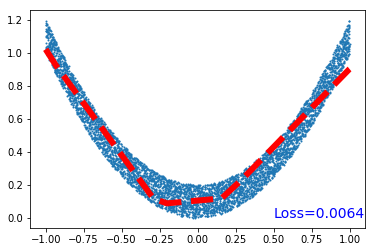

In [10]:
for t in range(500):
    pred = model(x)
    cost = loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 100  == 0:
        plt.scatter(x.data.numpy(), y.data.numpy(), s=1)
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % cost.item(), fontdict={'size':14, 'color':'b'})
        plt.show()